### 다음 분기에 어떤 게임을 설계해야 할까

[https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv]

---
🕹️ Data Description
- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 제작한 회사입니다.
- NA_Sales : 북미지역에서의 출고량입니다.
- EU_Sales : 유럽지역에서의 출고량입니다.
- JP_Sales : 일본지역에서의 출고량입니다.
- Other_Sales : 기타지역에서의 출고량입니다.


##  ▶ Goal of project
- '다음 분기에 어떤 게임을 설계해야 할까'를 정하는 과정과 그 결과를 보여주는 것

- 발표대상자 : 비데이터 직군

#  ▶ Keywords
- Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization
- Sprint 2 : Hypothesis Test, CI, Bayesian, AB Test
- Sprint 3 : DR, PCA, Clustering, GD

#  ▶ 반드시 들어가야 하는 내용
1. 지역에 따라서 선호하는 게임 장르가 다를까?
2. 연도별 게임의 트렌드가 있을까?
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
4. 개인적 분석 목표(미정)
...etc

#  ▶ 참고사항
- 발표 영상의 시간은 8분으로 제한
- 발표 영상 촬영 방법은 Zoom을 통해서
- 가능한 코드에 comment를 달아주는 것이 권장되지만, 모든 코드 내용을 일일이 한줄 한줄 설명할 필요는 없음
- "내가 이런 분석을 했는데, 이 부분만큼은 꼭 설명하고 싶다" 라는 내용이 있으면 설명해도 좋음

   ▶ START

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [ ]:
df = pd.read_csv('vgames2.csv')
df.head(20)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [ ]:
# 필요없는 column 'Unnamed: 0' 제거
df = df.drop(columns=['Unnamed: 0'], axis=1)
df = df.dropna()

In [ ]:
print('columns, dtype, isnull().sum()')
print(df.info())

columns, dtype, isnull().sum()
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB
None


In [ ]:
print('평균값')
print(df.describe())

평균값
               Year
count  16241.000000
mean    1994.178437
std      155.484265
min        0.000000
25%     2003.000000
50%     2007.000000
75%     2010.000000
max     2020.000000


In [ ]:
# sales 데이터 통일(K = 1,000. M = 1,000,000) 및 데이터타입을 float64로 변경하여 계산하기 쉽게 함.
def unit(x):
  if str(x).find("K") != -1:
    return float(str(x).split("K")[0].replace('.',''))*1000
  elif str(x).find("M") != -1:
    return float(str(x).split("M")[0].replace('.',''))*1000000
  else:
    return float(str(x).replace('.',''))*1000000

for col in ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']:
  df[col] = df[col].apply(unit)
print(df.dtypes)
df.head()

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,4000000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,17000000.0,0.0,0.0,1000000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,2000000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,4000000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,12000000.0,9000000.0,0.0,4000000.0


In [ ]:
# 결측값 확인
df.dropna(inplace=True)

In [ ]:
print('결측값 확인')
df.isnull().sum()

결측값 확인


Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

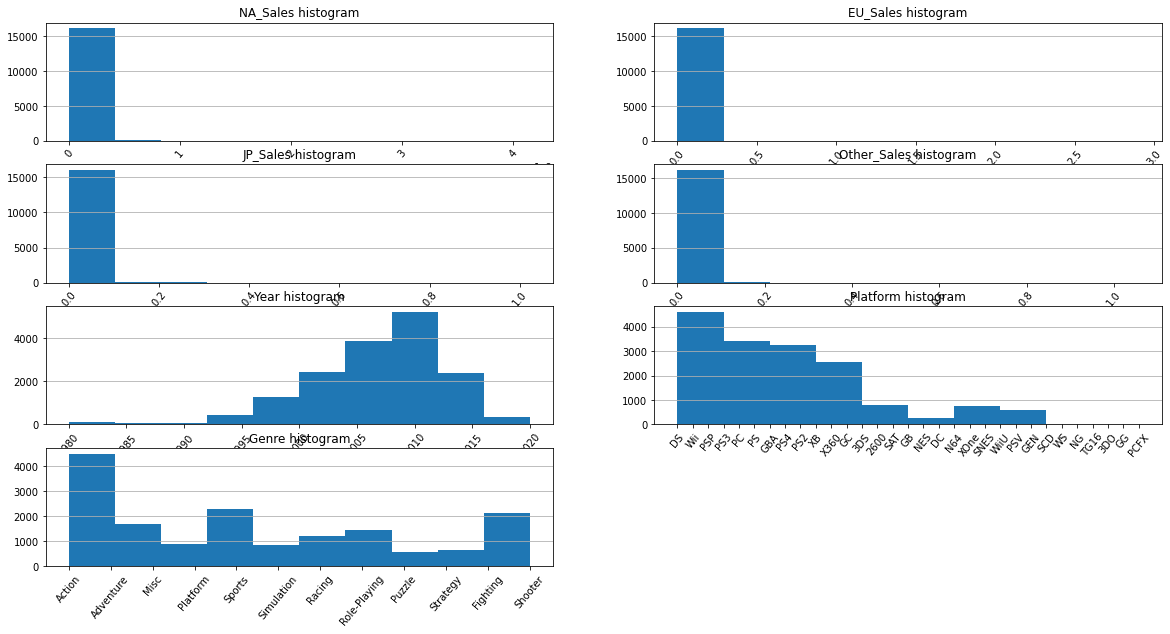

In [21]:
# column별 분포
plt.figure(figsize=(20,10))

for i,col_name in enumerate(df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Year','Platform','Genre']]):
  plt.subplot(4,2,i+1)
  plt.hist(df[col_name])
  plt.title(str(col_name)+' histogram')
  plt.grid(True,axis='y')
  plt.xticks(rotation=50)
plt.show()

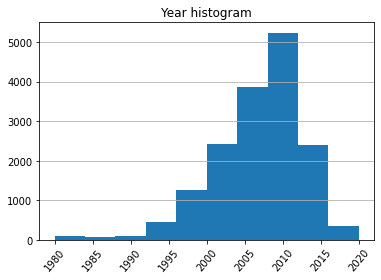

In [ ]:
# Year Histogram을 보면 0과 250 사이에 데이터가 존재하는 것을 볼 수 있음
def correct_year(x):
  if x <= 20:
    return x + 2000
  elif x <= 100:
    return x + 1900
  else:
    return x

df['Year'] = df['Year'].apply(correct_year)

plt.hist(df['Year'])
plt.title('Year histogram')
plt.grid(True,axis='y')
plt.xticks(rotation=50)
plt.show()

In [ ]:
print(np.sort(df['Year'].unique()))

[1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016. 2017. 2020.]


In [ ]:
# '전세계 판매량' 데이터를 가진 Feature 생성
df['Global_Sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

In [ ]:
# 5년 단위로 시기를 표현하는 Feature 생성
conditions = [df['Year'] <= 1985,
              (df['Year'] > 1985) & (df['Year'] <=1990),
              (df['Year'] > 1990) & (df['Year'] <=1995),
              (df['Year'] > 1995) & (df['Year'] <=2000), 
              (df['Year'] > 2000) & (df['Year'] <= 2005),
              (df['Year'] > 2005) & (df['Year'] <= 2010),
              (df['Year'] > 2010) & (df['Year'] <= 2015),
              (df['Year'] > 2015) & (df['Year'] <= 2020)
]

values = ['1980-1985','1985-1990','1990-1995','1995-2000','2000-2005','2005-2010','2010-2015','2015-2020']

df['In_Years'] = np.select(conditions,values)
df.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,In_Years,Global_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,4000000.0,0.0,0.0,0.0,2005-2010,4000000.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,17000000.0,0.0,0.0,1000000.0,2005-2010,18000000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,2000000.0,0.0,2005-2010,2000000.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,4000000.0,0.0,0.0,0.0,2005-2010,4000000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,12000000.0,9000000.0,0.0,4000000.0,2005-2010,25000000.0
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.0,0.0,14000000.0,0.0,2000-2005,14000000.0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,2000000.0,1000000.0,0.0,0.0,2010-2015,3000000.0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,7000000.0,0.0,11000000.0,1000000.0,2000-2005,19000000.0
8,Imabikisou,PS3,2007.0,Adventure,Sega,0.0,0.0,4000000.0,0.0,2005-2010,4000000.0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,4000000.0,3000000.0,0.0,1000000.0,2010-2015,8000000.0


In [ ]:
## Q1.지역에 따라 선호하는 게임 장르

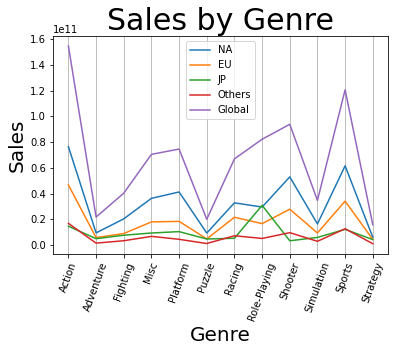

In [ ]:
group = df.groupby("Genre").sum()
plt.plot(group['NA_Sales'],label="NA")
plt.plot(group['EU_Sales'],label="EU")
plt.plot(group['JP_Sales'],label="JP")
plt.plot(group['Other_Sales'],label="Others")
plt.plot(group['Global_Sales'],label="Global")
plt.xlabel('Genre',fontsize=20)
plt.ylabel('Sales',fontsize=20)
plt.xticks(rotation=70)
plt.grid(axis='x')
plt.title("Sales by Genre",fontsize=30)
plt.legend()
plt.show()

## 지역에 따라 선호하는 게임 장르

 - 북미지역(NA) : Action > Sports > Shooter > Platform 순서로 인기가 많았음.
 - 유럽지역(EU) : Action > Sports > Shooter > Racing 순서로 인기가 많았음.
 - 일본지역(JP) : Role-Playing이 압도적으로 높고, Action > Sports > Platform 순서로 인기가 많았음.
 - 그 외 지역(Others) : Action > Sports > Shooter > Racing 순서로 인기가 많았음.
 - 전세계(Global) : Action > Sports > Shooter > Platform 순서로 인기가 많았음.



---

대체적으로 Action, Sports 장르는 각 지역별로 인기가 있었음. 북미, 유럽, 일본을 포함한 전지역을 대상으로 게임을 출시한다면, Action, Sports, Shooter 장르가 접목된 게임을 출시하는 것이 판매량에 큰 기여를 할 수 있을 것으로 보임. 

In [ ]:
## Q2. 연도별 게임의 트렌드가 존재?

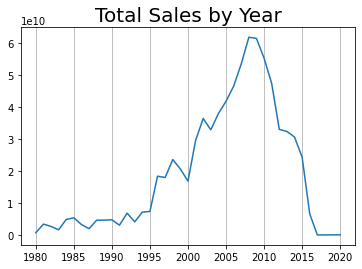

In [ ]:
plt.plot(df.groupby('Year')['Global_Sales'].sum())
plt.title(str("Total Sales by Year"),fontsize=20)
plt.grid(axis='x')
plt.show()

# 10년 단위로 성장과 감소를 Bar Chart를 통해 시각화
1980 - 1990 : 비디오 게임이 시장에 등장하였음.\
1990 - 2000 : 출고량이 조금씩 증가해갔으며, 비디오 게임에 대한 인지도가 상승한다고 보임.\
2000 - 2010 : 비디오게임 시장에서 판매량의 정점을 찍을 만큼 인기가 높음.\
2010 - 2020 : 다른 즐길거리가 생김에 따라 점점 하락세를 보임.

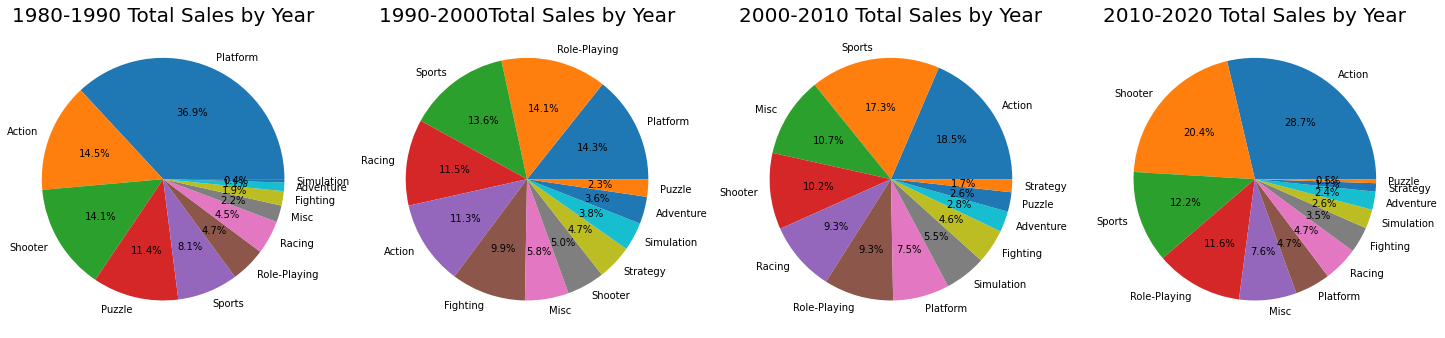

In [ ]:
fig, ax = plt.subplots(1, 4, figsize = (25,25))
# 1980-1990 Total Sales by Year
ratio1980 = df[df['Year'] <= 1990].groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
labels1980 = ratio1980.index
ax[0].pie(ratio1980,labels =labels1980, autopct='%.1f%%',textprops={'fontsize': 10})
ax[0].set_title('1980-1990 Total Sales by Year',fontsize = 20)

# 1990-2000 Total Sales by Year
ratio1990 = df[(df['Year'] > 1990)&(df['Year'] <= 2000)].groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
labels1990 = ratio1990.index
ax[1].pie(ratio1990,labels =labels1990, autopct='%.1f%%',textprops={'fontsize': 10})
ax[1].set_title('1990-2000Total Sales by Year',fontsize = 20)

# 2000-2010 Total Sales by Year
ratio2000 = df[(df['Year'] > 2000)&(df['Year'] <= 2010)].groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
labels2000 = ratio2000.index
ax[2].pie(ratio2000,labels =labels2000, autopct='%.1f%%',textprops={'fontsize': 10})
ax[2].set_title('2000-2010 Total Sales by Year',fontsize = 20)

# 2010-2020 Total Sales by Year
ratio2010 = df[(df['Year'] > 2010)&(df['Year'] <= 2020)].groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
labels2010 = ratio2010.index
ax[3].pie(ratio2010,labels =labels2010, autopct='%.1f%%',textprops={'fontsize': 10})
ax[3].set_title('2010-2020 Total Sales by Year',fontsize = 20)

plt.show()

## 연도별 게임의 트렌드 존재 여부
존재한다고 보임

---
1980 - 1990 : Platform 이 전체 장르의 36.9%를 차지할 만큼 높은 수치를 보여주고 있음.\
1990 - 2000 : 여전히 Platform 장르가 1등을 차지하지만, Role-Playing 과 Sports 장르가 큰 차이를 보이지는 않음.\
2000 - 2010 : Action과 Sports 장르가 주를 이루고 있음.\
2010 - 2020 : Action과 Shooter 장르가 여전히 주를 이루고 있으며, 그 전보다 더 큰 비중을 차지함.

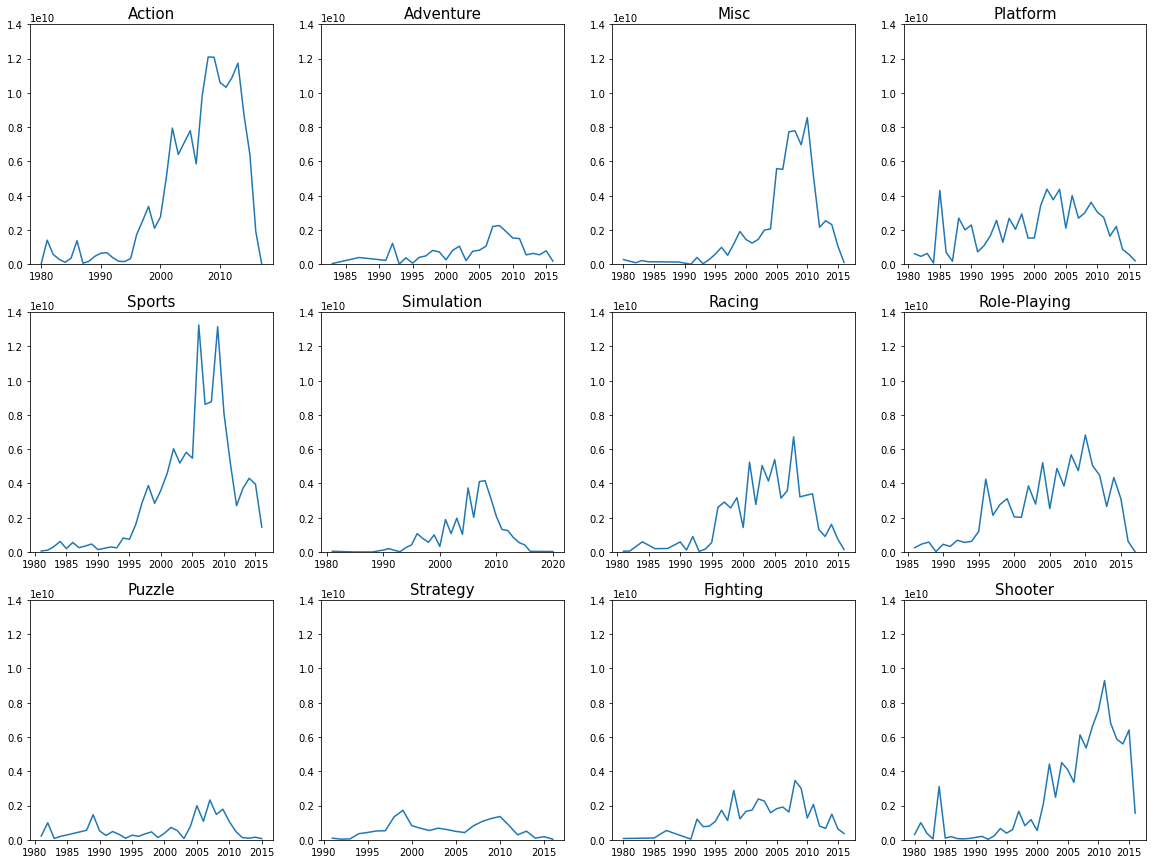

In [ ]:
# Q2+. 장르별 트렌드 존재 여부
plt.figure(figsize=(20,15))
Genre_col = df['Genre'].unique()
for i,genre_name in enumerate(Genre_col):
  plt.subplot(3,4,1+i)
  plt.plot(df[df['Genre'] == Genre_col[i]].groupby('Year')['Global_Sales'].sum())
  plt.title(str(genre_name),fontsize=15)
  plt.ylim(0,14000000000)
plt.show()

In [ ]:
# Q3.출고량이 높은 게임에 대한 분석 및 시각화 프로세스

## 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

- 출고량이 높다는 것은 그만큼 인기가 많다는 것인데, 출고량을 구별하는 기준으로 다른 플랫폼에 동일한 이름의 게임을 출시하는 것과 같은 IP를 가진 시리즈 게임을 출시하는 것이라고 판단하여, 이에 따라 분석 할 예정



In [ ]:
df_title = df.groupby('Name', as_index = False).sum()
df_title['Total_Sales'] = df_title.iloc[:,1:].sum(axis = 1)
df_title = df_title.sort_values(by = 'Total_Sales', ascending  = False).head(20)
df_name = df.loc[:,['Name','Publisher']]
df_title = pd.merge(df_title, df_name, how='left', on = 'Name').drop_duplicates().reset_index(drop = True)

<BarContainer object of 6 artists>

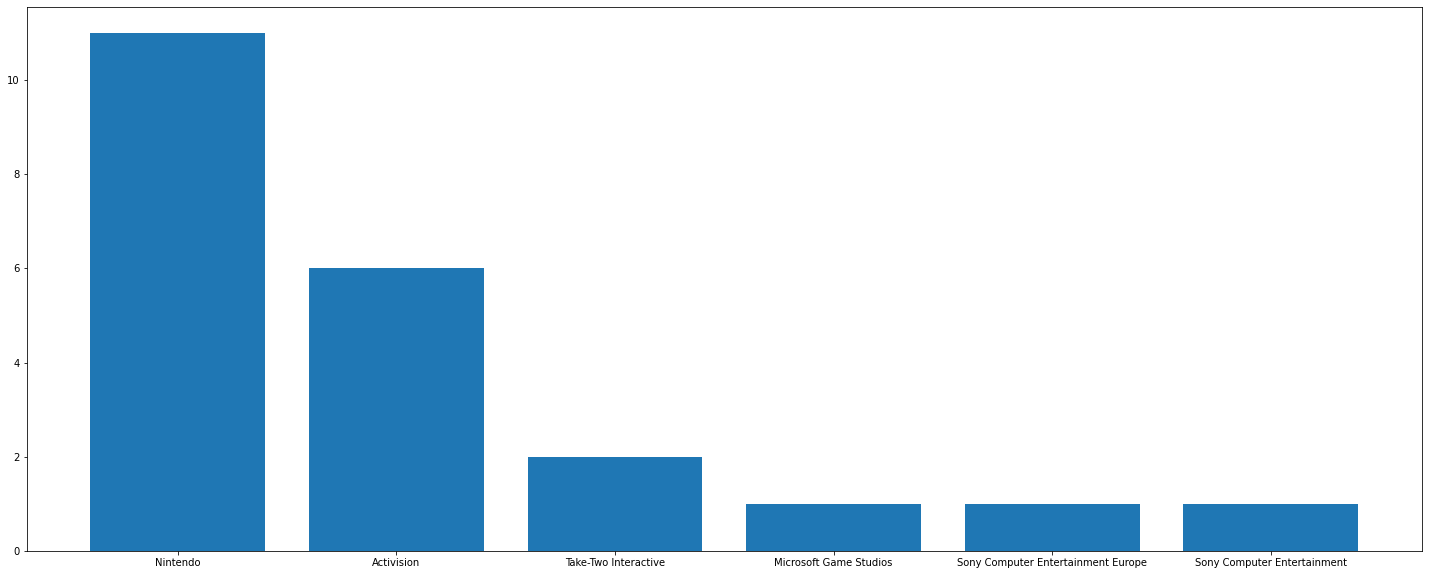

In [ ]:
publisher_count = df_title['Publisher'].value_counts()
plt.figure(figsize=(25,10))
plt.bar(publisher_count.index,publisher_count)

# 출고량이 높은 게임에 대한 분석 및 시각화 프로세스 결과
- 게임 데이터 중 중복값이 있어서 확인 해 본 결과 하나의 이름으로 여러 플랫폼에 출시한 경우가 있었음
- 데이터를 게임 이름으로 그룹화하여 하나의 이름을 가진 게임의 총 판매량을 구하고, 판매량 상위 20여개의 게임 이름을 찾아 대상 플랫폼을 조사하였는데, 닌텐도가 11개로 가장 많았고, 액티비젼이 6개, Take-Two Interactive가 2개, 그 외 1개씩 3개의 게임사가 나타남

# 결론
다음 분기에 어떤 게임을 설계해야 하는가?
- 최근 들어 비디오게임에 대한 인기가 과거 2000년대 초반에 비해 사그러들고 있기 때문에, 개발 단계에 있어서 신중을 기해야 할 것으로 보임.
- 다만, 2010년대에 이르러 Action, Shooting, Sports 장르가 두각을 보이고 있어서, 이 장르를 혼합 또는 단독 장르로 선정하여 개발하는 것이 좋다고 판단된다.
- 판매량이 높은 게임사로는 Nintendo가 Activision보다 앞서지만, Activision이 Shooting과 Action계열에서 두각을 나타내는 회사이므로 Action이나 Shooting 장르로 게임을 출시할 예정이라면 Activision을 통해 게임을 개발하여 출시하는것이 타 게임사 보다 안정적인 결과를 도출해내는데 도움이 될 것으로 판단된다.